<a href="https://colab.research.google.com/github/AarushiShahi/ML-Lab-1BM22CS002/blob/main/1BM22CS002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
=== Results on train.csv ===
Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

=== Iris Dataset (Default n_estimators=10) ===
Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Best Accuracy: 1.0000 with n_estimators = 100


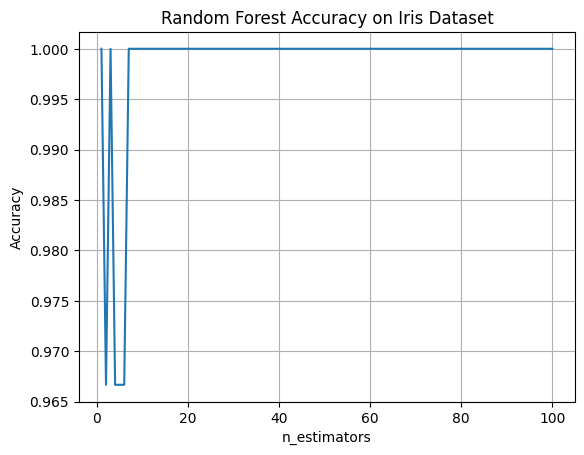

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


try:
    data = pd.read_csv("iris.csv")
except Exception as e:
    print(f"Error reading the dataset: {e}")

    raise


print("Dataset Summary:")
print(data.info())

data = data.dropna()


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

if y.dtype != 'object' and y.nunique() < 20:
    y = y.astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("=== Results on train.csv ===")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




iris = load_iris()
X_iris = iris.data
y_iris = iris.target


X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)


rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train_iris, y_train_iris)
y_pred_iris_default = rf_default.predict(X_test_iris)

print("\n=== Iris Dataset (Default n_estimators=10) ===")
print("Accuracy Score:", accuracy_score(y_test_iris, y_pred_iris_default))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris_default))


scores = []
n_range = range(1, 101)

for n in n_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train_iris, y_train_iris)
    y_pred = model.predict(X_test_iris)
    acc = accuracy_score(y_test_iris, y_pred)
    scores.append(acc)

best_n = n_range[scores.index(max(scores))]
print(f"\nBest Accuracy: {max(scores):.4f} with n_estimators = {n}")


plt.plot(n_range, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy on Iris Dataset')
plt.grid(True)
plt.show()

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
=== Results on iris.csv with SVM ===
Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

=== Iris Dataset (SVM with Default C=1.0) ===
Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Best Accuracy: 1.0000 with C = 1


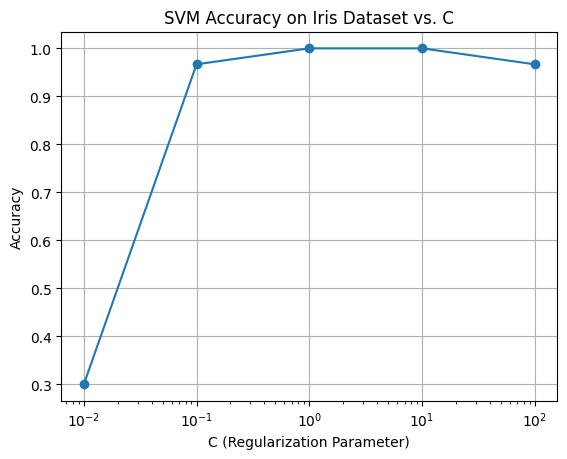

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


try:
    data = pd.read_csv("iris.csv")
except Exception as e:
    print(f"Error reading the dataset: {e}")
    raise

print("Dataset Summary:")
print(data.info())


data = data.dropna()


X = data.iloc[:, :-1]
y = data.iloc[:, -1]


if y.dtype != 'object' and y.nunique() < 20:
    y = y.astype('category')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)
print("=== Results on iris.csv with SVM ===")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


iris = load_iris()
X_iris = iris.data
y_iris = iris.target


X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)


svm_default = SVC(C=1.0, random_state=42)
svm_default.fit(X_train_iris, y_train_iris)
y_pred_iris_default = svm_default.predict(X_test_iris)

print("\n=== Iris Dataset (SVM with Default C=1.0) ===")
print("Accuracy Score:", accuracy_score(y_test_iris, y_pred_iris_default))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris_default))

scores = []
C_values = [0.01, 0.1, 1, 10, 100]

for c in C_values:
    model = SVC(C=c, random_state=42)
    model.fit(X_train_iris, y_train_iris)
    y_pred = model.predict(X_test_iris)
    acc = accuracy_score(y_test_iris, y_pred)
    scores.append(acc)

best_c = C_values[scores.index(max(scores))]
print(f"\nBest Accuracy: {max(scores):.4f} with C = {best_c}")


plt.plot(C_values, scores, marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy on Iris Dataset vs. C')
plt.grid(True)
plt.show()


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


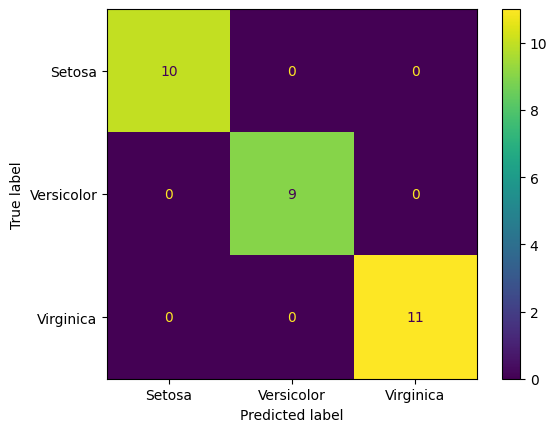

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt


iris = pd.read_csv("iris.csv")
iris.head()


X = iris.drop('species', axis='columns')


y = iris.species


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(solver='lbfgs')

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Setosa", "Versicolor", "Virginica"])
cm_display.plot()
plt.show()